In [4]:
import os
from os.path import isfile, join

import re

import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
path = '../data/graphs/kw34/results'

def build_df_from_csvs(path: str) -> pd.DataFrame:
    files = os.listdir(path)
    df = pd.DataFrame()

    for current_file in files:
    # current_file = files[0]
        df_tmp = pd.read_csv(join(path, current_file), delimiter=',\t')
        
        prefix = [re.findall(r'(\w+?)(\d+\.\d+|\d+)', identifier)[0] for identifier in current_file.split('-')[0].split('_')]
        for cn, cv in prefix:
            df_tmp[cn] = pd.to_numeric(cv)

        suffix = current_file.split('-')[2].split('_')
        if len(suffix) == 3:
            suffix[1] = '{}_{}'.format(suffix[1], suffix[2])
            suffix.pop(2)
        suffix[1] = suffix[1].split('.')[0]
        df_tmp['Sampling'] = suffix[0]
        df_tmp['Clustering'] = suffix[1]
        
        df = pd.concat([df, df_tmp])

    # postprocess
    df['jsd'] = df['jsd'].apply(lambda x: 1 - x)
    df.rename(columns = {'jsd':'ijsd'}, inplace = True)

    df['bootstrap_jsd'] = df['bootstrap_jsd'].apply(lambda x: 1 - x)
    df.rename(columns = {'bootstrap_jsd':'inverse_bootstrap_jsd'}, inplace = True)

    return df

df = build_df_from_csvs(path)
df.head()

,Checkpoint,inverse_bootstrap_jsd,gambette,cluster_number,ijsd,ari,n,k,log,Sampling,Clustering
0,10,1.000000,0.994230,1,0.974538,1.000000,100,3,0.3,modifiedrandomwalk,cw
1,20,1.000000,0.978541,1,0.974538,1.000000,100,3,0.3,modifiedrandomwalk,cw
2,30,0.986457,0.976104,3,0.792277,0.000000,100,3,0.3,modifiedrandomwalk,cw
3,40,0.984815,0.956944,2,0.931105,-0.061798,100,3,0.3,modifiedrandomwalk,cw
4,50,0.974824,0.951358,3,0.845357,-0.034217,100,3,0.3,modifiedrandomwalk,cw


In [6]:
sns.set_theme(style="darkgrid")
checkpoints = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 2000,  3000, 4000, 5000]

df_overview = pd.melt(df, id_vars=['Checkpoint'], value_vars=['ari', 'ijsd', 'inverse_bootstrap_jsd', 'gambette'], var_name='Measure', value_name='Performance')
df_overview.head()

,Checkpoint,Measure,Performance
0,10,ari,1.000000
1,20,ari,1.000000
2,30,ari,0.000000
3,40,ari,-0.061798
4,50,ari,-0.034217


In [7]:
df_overview = df_overview.sort_values(by=['Measure'])
df_overview.head()

,Checkpoint,Measure,Performance
0,10,ari,1.000000
70365,400,ari,0.926798
70364,300,ari,0.866246
70363,200,ari,0.648787
70362,100,ari,0.717880


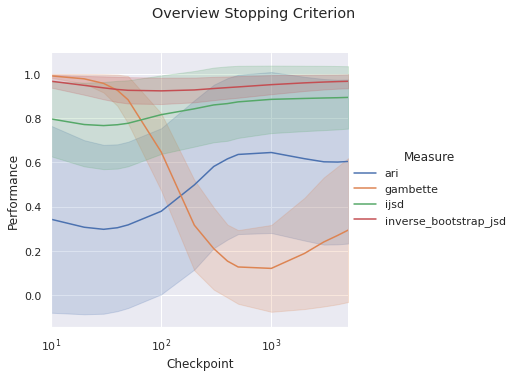

In [8]:
rp = sns.relplot(data=df_overview,
    x='Checkpoint', y='Performance', hue='Measure', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.85)
rp.fig.suptitle('Overview Stopping Criterion')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])

In [9]:
del(df_overview)

df_k_overview = pd.melt(df, id_vars=['Checkpoint', 'k'], value_vars=['ari', 'ijsd', 'inverse_bootstrap_jsd', 'gambette'], var_name='Measure', value_name='Performance')
df_k_overview.head()

,Checkpoint,k,Measure,Performance
0,10,3,ari,1.000000
1,20,3,ari,1.000000
2,30,3,ari,0.000000
3,40,3,ari,-0.061798
4,50,3,ari,-0.034217


In [10]:
df_k_overview = df_k_overview.sort_values(by=['Measure'])
df_k_overview.head()

,Checkpoint,k,Measure,Performance
0,10,3,ari,1.000000
70365,400,20,ari,0.926798
70364,300,20,ari,0.866246
70363,200,20,ari,0.648787
70362,100,20,ari,0.717880


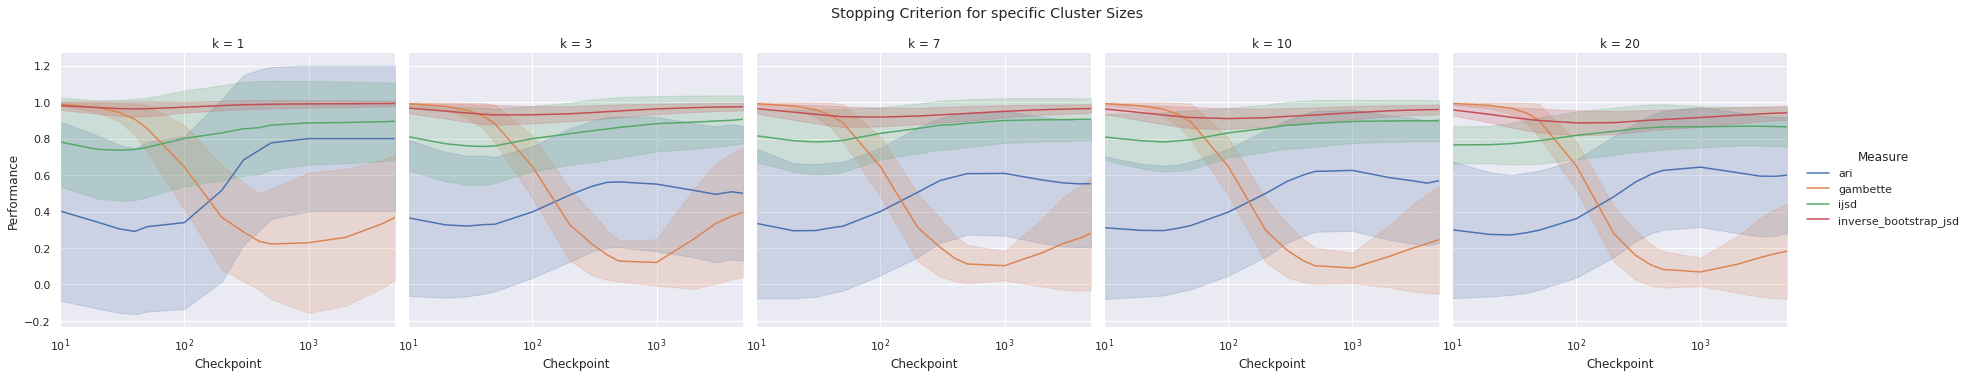

In [11]:
rp = sns.relplot(data=df_k_overview,
    x='Checkpoint', y='Performance', hue='Measure', col='k', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.85)
rp.fig.suptitle('Stopping Criterion for specific Cluster Sizes')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])

In [12]:
del(df_k_overview)

df_log_overview = pd.melt(df, id_vars=['Checkpoint', 'log'], value_vars=['ari', 'ijsd', 'inverse_bootstrap_jsd', 'gambette'], var_name='Measure', value_name='Performance')
df_log_overview.head()

,Checkpoint,log,Measure,Performance
0,10,0.3,ari,1.000000
1,20,0.3,ari,1.000000
2,30,0.3,ari,0.000000
3,40,0.3,ari,-0.061798
4,50,0.3,ari,-0.034217


In [13]:
df_log_overview = df_log_overview.sort_values(by=['Measure'])
df_log_overview.head()

,Checkpoint,log,Measure,Performance
0,10,0.3,ari,1.000000
70365,400,0.3,ari,0.926798
70364,300,0.3,ari,0.866246
70363,200,0.3,ari,0.648787
70362,100,0.3,ari,0.717880


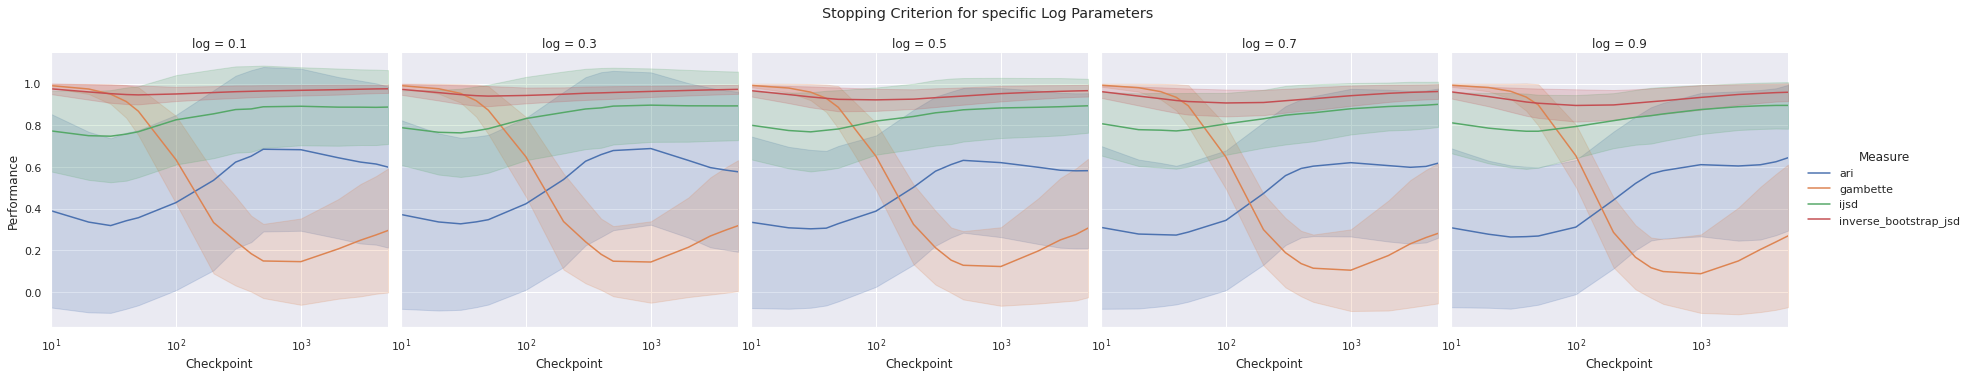

In [14]:
rp = sns.relplot(data=df_log_overview,
    x='Checkpoint', y='Performance', hue='Measure', col='log', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.85)
rp.fig.suptitle('Stopping Criterion for specific Log Parameters')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])

In [15]:
del(df_log_overview)

df_klog_overview = pd.melt(df, id_vars=['Checkpoint', 'k', 'log'], value_vars=['ari', 'ijsd', 'inverse_bootstrap_jsd', 'gambette'], var_name='Measure', value_name='Performance')
df_klog_overview.head()

,Checkpoint,k,log,Measure,Performance
0,10,3,0.3,ari,1.000000
1,20,3,0.3,ari,1.000000
2,30,3,0.3,ari,0.000000
3,40,3,0.3,ari,-0.061798
4,50,3,0.3,ari,-0.034217


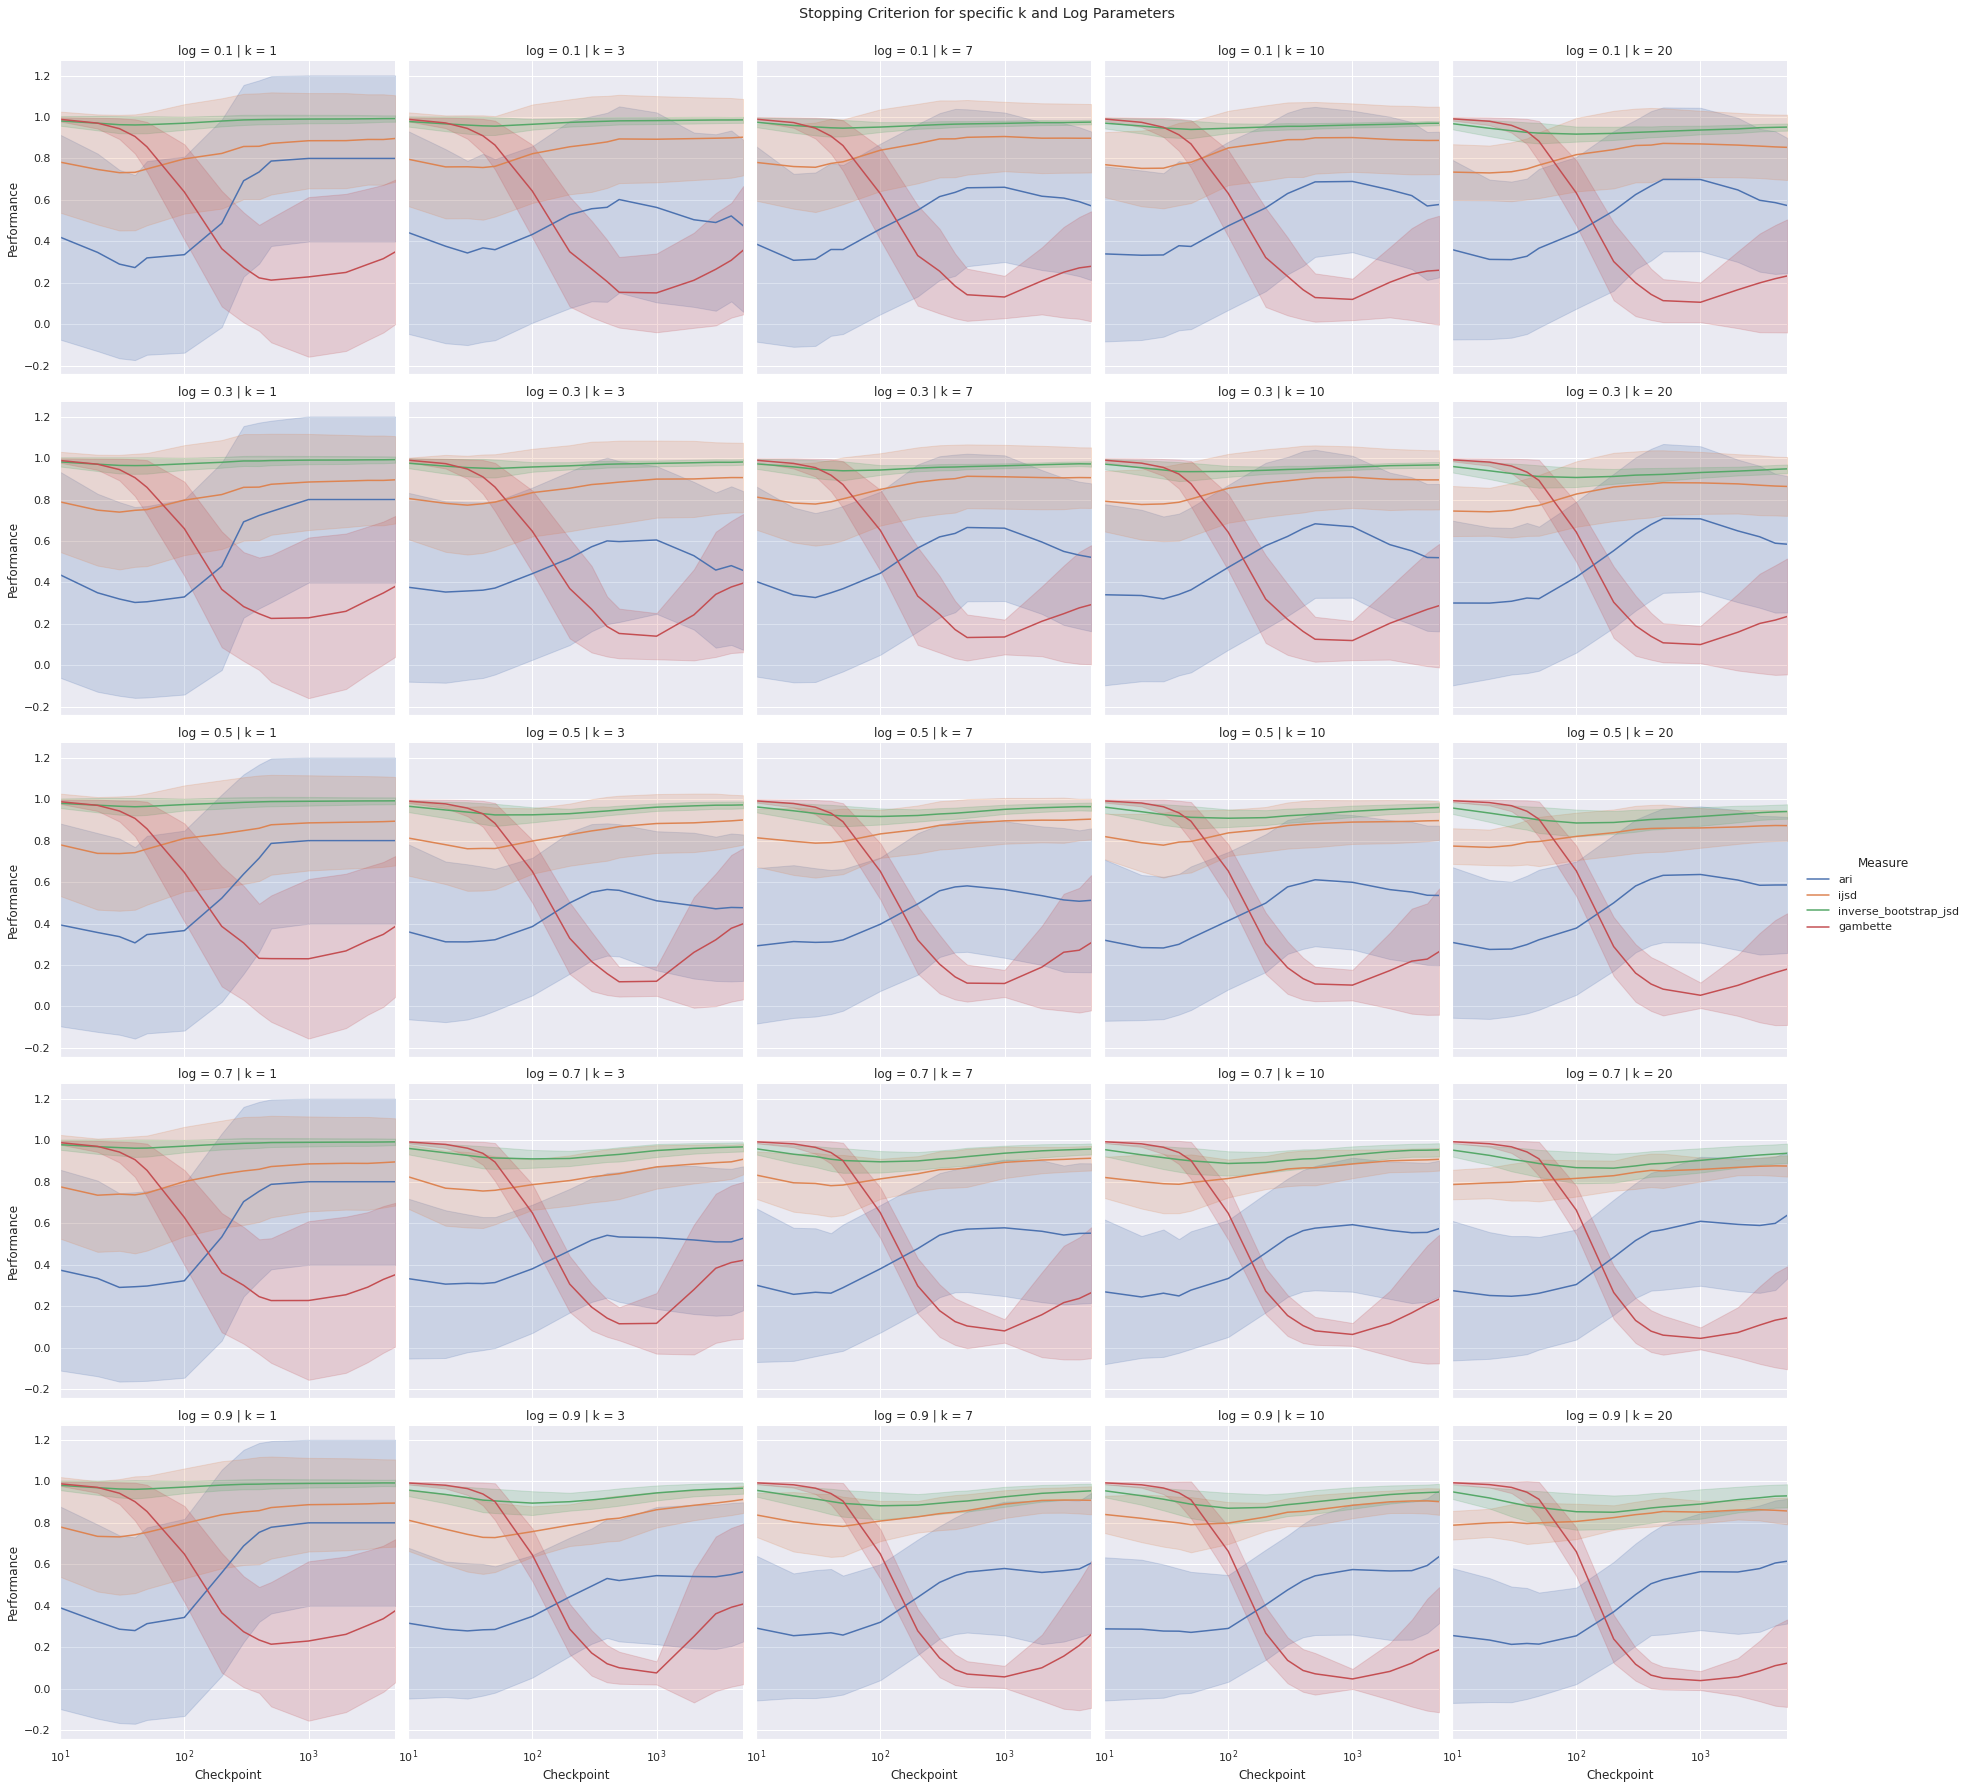

In [16]:
rp = sns.relplot(data=df_klog_overview,
    x='Checkpoint', y='Performance', hue='Measure', col='k', row='log', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Stopping Criterion for specific k and Log Parameters')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])

In [17]:
del(df_klog_overview)

df_clustering_overview = pd.melt(df, id_vars=['Checkpoint', 'Clustering'], value_vars=['ari', 'ijsd', 'inverse_bootstrap_jsd', 'gambette'], var_name='Measure', value_name='Performance')
df_clustering_overview.head()

,Checkpoint,Clustering,Measure,Performance
0,10,cw,ari,1.000000
1,20,cw,ari,1.000000
2,30,cw,ari,0.000000
3,40,cw,ari,-0.061798
4,50,cw,ari,-0.034217


In [18]:
df_clustering_overview = df_clustering_overview.sort_values(by=['Clustering', 'Measure'])
df_clustering_overview.head()

,Checkpoint,Clustering,Measure,Performance
255,10,cc_nosplit,ari,0.012987
256,20,cc_nosplit,ari,0.003714
257,30,cc_nosplit,ari,0.003930
258,40,cc_nosplit,ari,0.006673
259,50,cc_nosplit,ari,0.007165


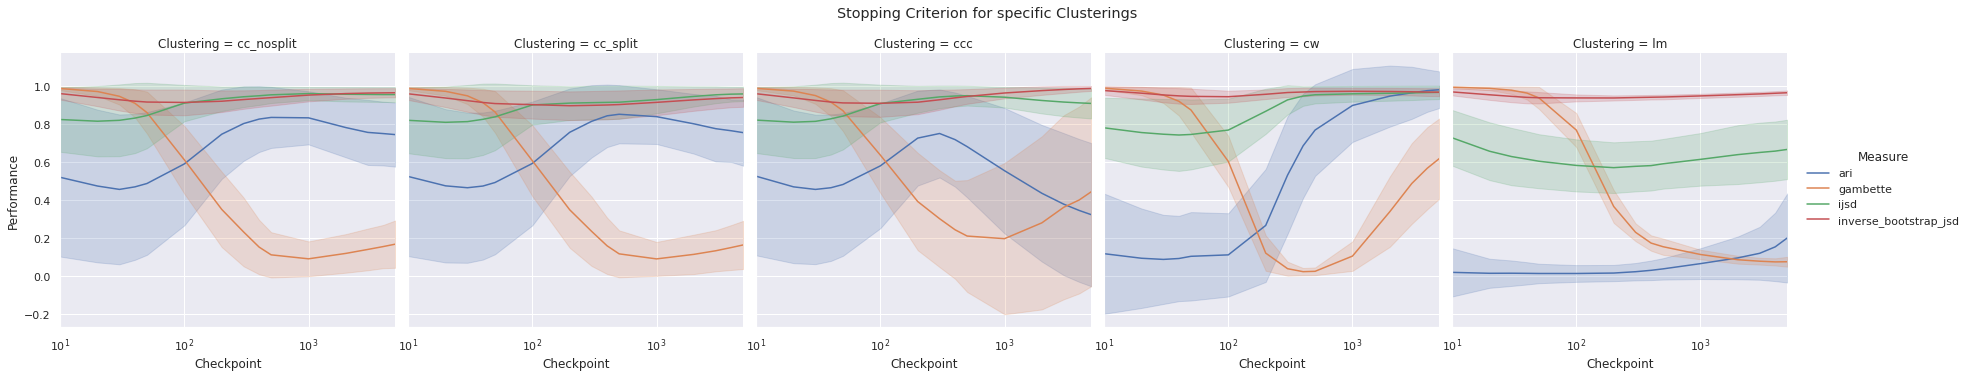

In [19]:
rp = sns.relplot(data=df_clustering_overview,
    x='Checkpoint', y='Performance', hue='Measure', col='Clustering', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.85)
rp.fig.suptitle('Stopping Criterion for specific Clusterings')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])

In [20]:
del(df_clustering_overview)

df_sampling_overview = pd.melt(df, id_vars=['Checkpoint', 'Sampling'], value_vars=['ari', 'ijsd', 'inverse_bootstrap_jsd', 'gambette'], var_name='Measure', value_name='Performance')
df_sampling_overview.head()

,Checkpoint,Sampling,Measure,Performance
0,10,modifiedrandomwalk,ari,1.000000
1,20,modifiedrandomwalk,ari,1.000000
2,30,modifiedrandomwalk,ari,0.000000
3,40,modifiedrandomwalk,ari,-0.061798
4,50,modifiedrandomwalk,ari,-0.034217


In [21]:
df_sampling_overview = df_sampling_overview.sort_values(by=['Sampling', 'Measure'])
df_sampling_overview.head()

,Checkpoint,Sampling,Measure,Performance
45,10,dwug,ari,0.146341
46,20,dwug,ari,0.248959
47,30,dwug,ari,0.380697
48,40,dwug,ari,0.931272
49,50,dwug,ari,0.520317


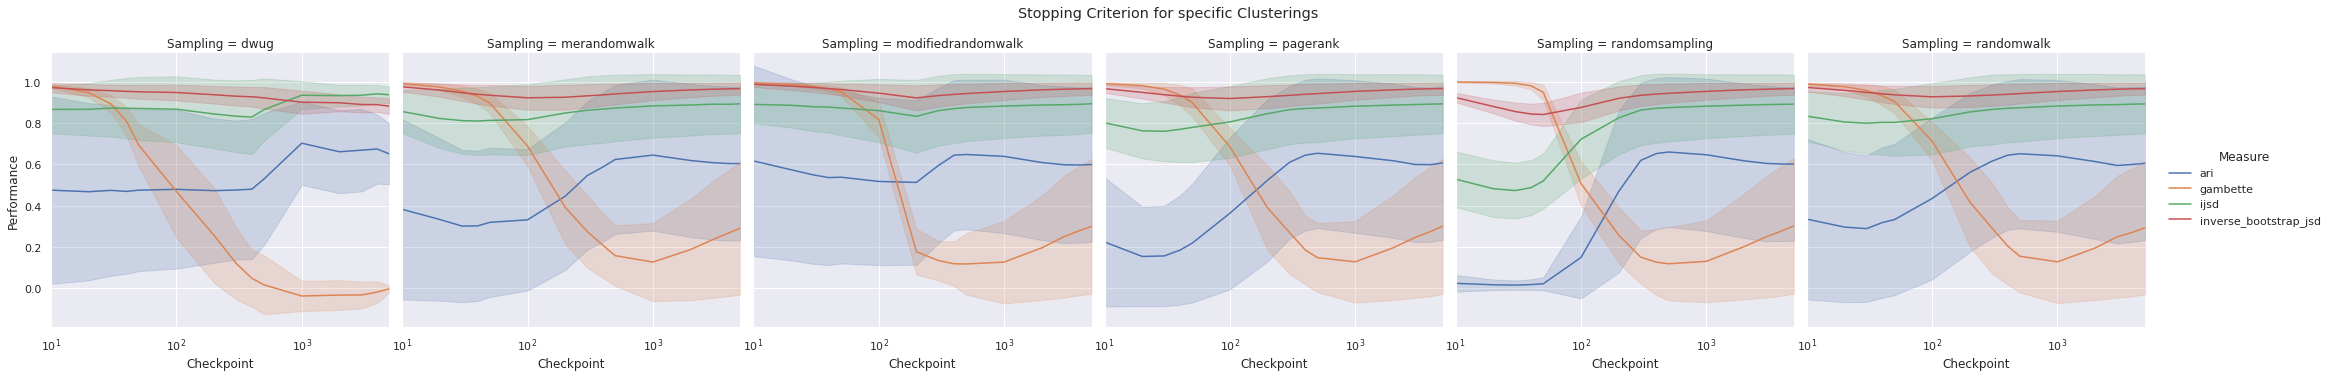

In [22]:
rp = sns.relplot(data=df_sampling_overview,
    x='Checkpoint', y='Performance', hue='Measure', col='Sampling', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.85)
rp.fig.suptitle('Stopping Criterion for specific Clusterings')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])